## London Marathon ballot chances

Winners of the London Marathon ballot are chosen at random. There are about **17,000 ballot places** available to win every year, and the odds are never in your favour, as there were reportedly **410,000 entries** into the ballot for the 2023 race.

Starting with the 2024 event, the London Marathon introduced the option of having **two entries instead of one**, for applicants who opt to pay at registration and donate their entry fee in case of not being selected.

But does paying the entry fee up front increase your chances significantly? Are 2 entries worth the price and additional hope? To determine our best course of monetary action here, we need to calculate the probability of getting a place with both 1 or 2 entries.

_*The numbers used in this notebook are taken [from this article](https://www.runnersworld.com/uk/news/a41405786/london-marathon-ballot/) citing the 2023 London Marathon (in lieu of the yet unknown 2024 data) when double entries were not yet in effect, so these calculations are definitely not going to be accurate for the actual 2024 event._

In [3]:
# Initial setup

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [4]:
# This data is based on the reported numbers for the 2023 race

available_places = 17_000
total_applications = 41_0000

## Calculating Probability of Getting a Place

We first calculate the probability of getting a place with 1 and 2 entries. Note that only one place can be won per runner, and both entries can't be winners, so we calculate the possibility of winning with either entry exclusively.

In [5]:
def percent(x):
    return "{:.2f}".format(x * 100)

# The probability of winning with one entry is simply P / A, or:
# 17,000 / 410,000 ≈ 0.04146

prob_1_entry = available_places / total_applications

# Not winning is just the complement of the probability of winning with one entry:
# 1 - 0.04146 ≈ 0.95854

prob_not_1_entry = 1 - prob_1_entry

# Importantly, only one place can be won per runner, and both entries can't be winners, 
# so we calculate the possibility of winning with either entry exclusively: 
# P(A or B) = 1 - P(not A and not B) = 1 - (1 - P(A))^2

prob_2_entries = prob_1_entry * (1 - prob_1_entry) * 2

# Then the probability of not winning with both entries is the joint probability of not winning with either

prob_not_2_entries = prob_not_1_entry ** 2

## Ballot Chances In Numbers

In [8]:
print("London Marathon Ballot Chances\n")
print(f"1 Entry:")
print(f"  + Probability of getting a place: {prob_1_entry:.5f} ({percent(prob_1_entry)}%)")
print(f"  - Probability of not getting a place: {prob_not_1_entry:.5f} ({percent(prob_not_1_entry)}%)\n")

print("2 Entries:")
print(f"  + Probability of getting a place: {prob_2_entries:.5f} ({percent(prob_2_entries)}%)")
print(f"  - Probability of not getting a place: {prob_not_2_entries:.5f} ({percent(prob_not_2_entries)}%)")


London Marathon Ballot Chances

1 Entry:
  + Probability of getting a place: 0.04146 (4.15%)
  - Probability of not getting a place: 0.95854 (95.85%)

2 Entries:
  + Probability of getting a place: 0.07949 (7.95%)
  - Probability of not getting a place: 0.91879 (91.88%)


## The Influence of Other Runners: do they affect our chances?

There's the question of how many other people in that pool also have 2 entries, and whether this affects our chances in any way.

If a runner with two entries wins with one entry, their other entry effectively becomes invalid, since they cannot run the race twice. So if their second entry also ends up winning, another entry will have to be selected in its stead, which **intuitively** means there's one less entry in the ballot we have to compete with, and our chances should be positively affected.

However, if a runner with two entries wins one place, **statistically** the chance of their second entry also being selected is very low.

`probability_of_single_winning_entry = available_places / total_entries = 17,000 / 410,000 ≈ 0.04146`

`probability_of_two_winning_entries = probability_of_single_winning_entry * (probability_of_single_winning_entry - 1 / (total_entries - 1)) = 0.04146 * (0.04146 - 1 / 409,999) ≈ 0.001719`

This shows that the probability of both entries from the same individual being selected is **a very low 0.1719%**. 

This percentage means that even in the unlikely scenario of every single applicant having 2 entries, only 352 would have both entries selected, which would only decrease the pool of 410,000 applications by 0.0859%. 

This is still low enough that it does not significantly impact the overall probability of getting a place for the other applicants, but in reality, many runners would not have more than a single entry anyway, so this tiny number would  be even smaller.

## Visualizing Ballot Chances:
## The bad news about double entries

Having two entries does mean a higher probability of us getting in, as previously established.

It really looks like a **significant improvement of chances** in comparison to only having one entry when presented on the following chart:

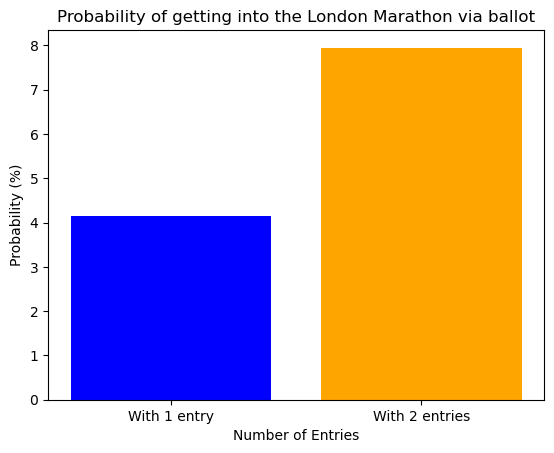

In [2]:
plt.bar(['With 1 entry', 'With 2 entries'], [prob_1_entry * 100, prob_2_entries * 100], color=['blue', 'orange'])


plt.title('Probability of getting a place in the London Marathon via ballot')
plt.xlabel('Number of Entries')
plt.ylabel('Probability (%)')

plt.show()

When visualised likes this, that 7.95% looks very promising. 

However, if we take a look at the chart in the next section, which shows how the available ballot places compare to the total number of applications, we can easily see how miniscule even the relatively higher chance of winning by having 2 entries is.

## Ballot Places vs Total Applications

This chart provides a stark visual representation of the low odds of securing a place in the London Marathon via the ballot, even when applying with 2 entries

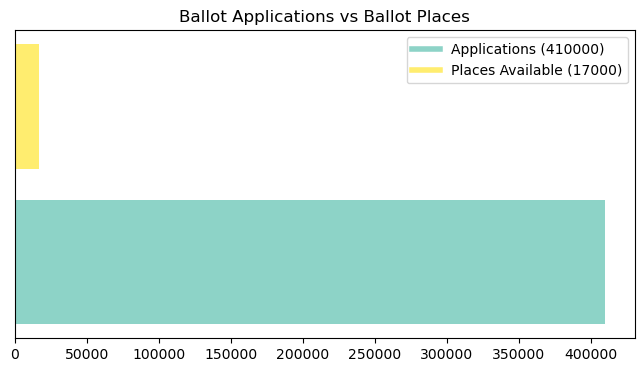

In [11]:
values = [total_applications, available_places]
categories = [f'Applications ({values[0]})', f'Places Available ({values[1]})']
colors = plt.cm.Set3(np.linspace(0, 1, len(categories)))

fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.barh(categories, values, color=colors)

ax.set_yticks([])
ax.set_yticklabels('')

plt.title('Ballot Applications vs Ballot Places')

legend_elements = [Line2D([0], [0], color=colors[i], lw=4, label=categories[i]) for i in range(len(categories))]
ax.legend(handles=legend_elements, loc='best')


plt.show()

## Non-ballot entries

Fortunately, there are ways of getting an entry into the marathon besides the official ballot, so you might still be one of the **45,000 runners** at the start line on race day.

Charities can buy entries from the London Marathon, they allocate these places to runners who agree to raise a minimum amount of money for that charity in return. There are around **15,000 charity places** available.

British Athletics affiliated clubs can apply for places to give to their **Championship** winning athletes, with around **1,000** are available in total.

There are **6,000 Good For Age** places, which are for runners who achieve a relevant qualifying time for their age group.

**100 elite athletes** are also allocated places in the London Marathon.

The remaining places are likely given to international tour operators, celebrities, previous deferrals, or given away as competition prizes.

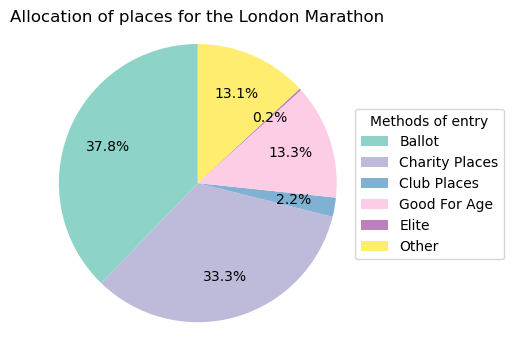

In [13]:
# Allocation of places for various entry methods

total_places = 45000
charity_places = 15000
club_places = 1000
good_for_age_places = 6000
elite_places = 100

other_runners = total_places - (available_places + charity_places + club_places + good_for_age_places + elite_places)

labels = ['Ballot', 'Charity Places', 'Club Places', 'Good For Age', 'Elite', 'Other']
allocations = [available_places, charity_places, club_places, good_for_age_places, elite_places, other_runners]

# Pie chart plot

fig, ax = plt.subplots(figsize=(4, 4))
wedges, texts, autotexts = ax.pie(allocations, 
                                  colors=plt.cm.Set3(np.linspace(0, 1, len(labels))), 
                                  autopct='%.1f%%', 
                                  startangle=90, 
                                  pctdistance=0.7)

plt.title('Allocation of places for the London Marathon')

plt.axis('equal')

ax.legend(wedges, labels, title="Methods of entry", loc="center", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


The pie chart clearly shows that the second biggest pool is Charity Places. While there's no way to get actual data on all the charities and their applicants, the **probability of getting a charity place** is definitely higher than a ballot place, simply because the requirements are less prohibitive for charity entries. 

Charity runners need to pay a registration fee and commit to a fundraising target of about £2,000 on average. All that is much harder to do than just fill in a form, so the pool of applicants for charity places is likely less numerous. In case you don't trust your ballot chances, you could sign up to support [any of these charities](https://www.tcslondonmarathon.com/enter/how-to-enter/charities-with-places) listed on the London Marathon site.


## Conclusion

This analysis set out to answer the question: "Does paying the entry fee up front increase your chances significantly? Are 2 entries worth the price and additional hope?".

Given the data, it's clear that submitting two entries does increase your chances of success in the London Marathon ballot. While the actual probabilities are small, the relative increase from one to two entries is quite substantial, almost doubling your chances of success. That said, even with two entries, the chances of securing a place in the marathon via the ballot remain low due to the significant oversubscription.

It's also worth noting that there are several non-ballot methods for gaining an entry into the London Marathon. For example, the number of Charity Places is nearly equivalent to the number of Ballot Places, and while securing a Charity Place requires a larger commitment, it may present a higher probability of success for those ready to undertake fundraising.


Please note, this analysis is based on available data and some assumptions. The actual probabilities for any given year may vary due to factors not included in this analysis. Good luck!